#### Spectral graph cut using normalized Laplacian ####

I made an error in class on March 31 on the way to use eigenvalues of the graph Laplacian to find multiple partitions, so I'll fix that now.

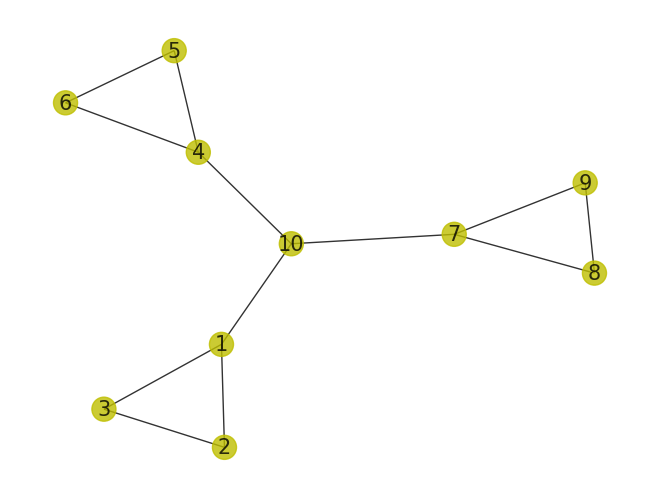

In [4]:
import networkx as nx
from matplotlib import pyplot as plt
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5,6,7,8,9,10])
G.add_edges_from([(1,2),(1,3),(2,3),(4,5),(4,6),(5,6),(7,8),(7,9),(8,9),(1,10),(4,10),(7,10)])
colormap = []
[colormap.append('y') for nodes in G.nodes()]
pos = nx.nx_agraph.graphviz_layout(G,prog='neato')
plt.figure(1)
plt.clf()
nx.draw(G,pos,with_labels = True,node_color = colormap, node_size = 300,font_size = 15, alpha=0.8)

Find the normalized graph Laplacian $D^{-\frac{1}{2}}LD^{-\frac{1}{2}}$. Do a sanity check to make sure there are ones on the diagonal.

In [67]:
from networkx import linalg as LA
normalized_Laplacian = LA.normalized_laplacian_matrix(G).toarray()
print(normalized_Laplacian)

[[ 1.         -0.40824829 -0.40824829  0.          0.          0.
   0.          0.          0.         -0.33333333]
 [-0.40824829  1.         -0.5         0.          0.          0.
   0.          0.          0.          0.        ]
 [-0.40824829 -0.5         1.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          1.         -0.40824829 -0.40824829
   0.          0.          0.         -0.33333333]
 [ 0.          0.          0.         -0.40824829  1.         -0.5
   0.          0.          0.          0.        ]
 [ 0.          0.          0.         -0.40824829 -0.5         1.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   1.         -0.40824829 -0.40824829 -0.33333333]
 [ 0.          0.          0.          0.          0.          0.
  -0.40824829  1.         -0.5         0.        ]
 [ 0.          0.          0.          0.          0.  

Find the fiedler vector

In [65]:
# I don't believe the following code works because each time I run it I 
# get a different answer, even if I normalize it
fiedler_vector = LA.fiedler_vector(G,normalized = True)
print(fiedler_vector/(fiedler_vector.T@fiedler_vector))

[-2.13649203e-01 -2.30044210e-01 -2.30044210e-01 -2.34387336e-01
 -2.52373745e-01 -2.52373745e-01  4.48036540e-01  4.82417953e-01
  4.82417953e-01  2.13704478e-09]


Try again to find the fiedler eigenvector with eigenvalue solver

In [90]:
import numpy as np
eig_values, eig_vectors = np.linalg.eig(normalized_Laplacian)
print("eigenvalues are ",sorted(eig_values)) # Smallest eigenvalue won't be exactly 0 because that's not how eigenvalue solvers work
sorted_indices = np.argsort(eig_values)
print("fiedler value is ",eig_values[sorted_indices[1]]) # print the second smallest eigenvalue
fiedler_vector = eig_vectors[:,sorted_indices[1]]
print("fiedler vector is ",fiedler_vector)

eigenvalues are  [1.6809606916635067e-17, 0.12084713039410389, 0.12084713039410411, 0.7712864461218314, 1.3791528696058957, 1.3791528696058961, 1.4999999999999996, 1.4999999999999998, 1.5000000000000013, 1.728713553878169]
fiedler value is  0.12084713039410389
fiedler vector is  [ 8.01865937e-02  8.63399499e-02  8.63399499e-02 -4.21980264e-01
 -4.54362172e-01 -4.54362172e-01  3.41793671e-01  3.68022222e-01
  3.68022222e-01 -7.93997566e-17]


Sort the values of the fiedler vector from largest to smallest

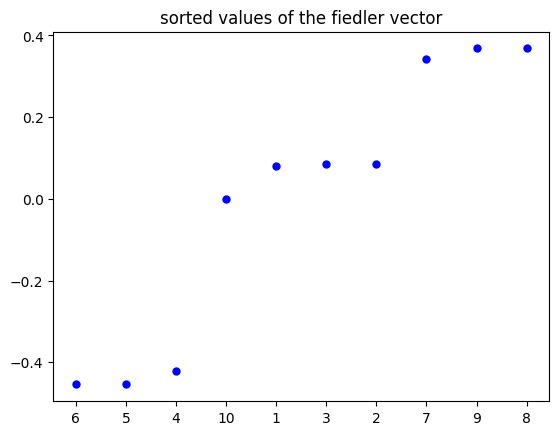

In [93]:
import numpy as np
sorted_fiedler_vector = np.sort(fiedler_vector)
plt.plot(sorted_fiedler_vector,'b.',markersize=10)
plt.title("sorted values of the fiedler vector")
tmp = plt.xticks(ticks = range(0,len(fiedler_vector)), labels = np.argsort(fiedler_vector)+1)

Repeat for the Karate Graph

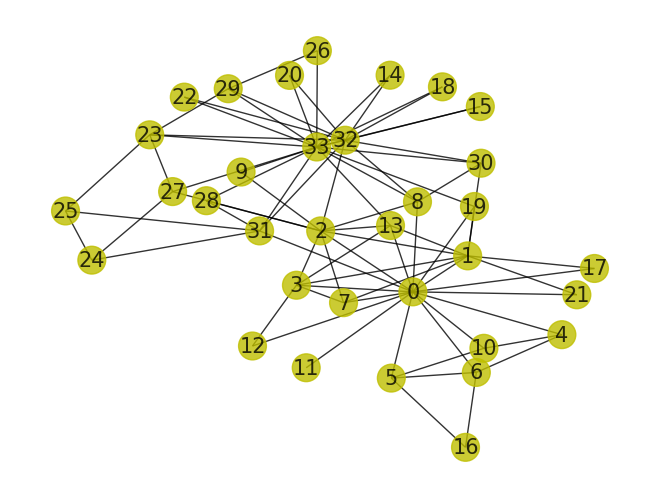

In [95]:
G = nx.karate_club_graph()
colormap = ['y' for nodes in list(G.nodes())]
pos = nx.nx_agraph.graphviz_layout(G,prog='neato')
plt.figure(1)
plt.clf()
nx.draw(G,pos,with_labels = True,node_color = colormap, node_size = 400,font_size = 15, alpha=0.8)

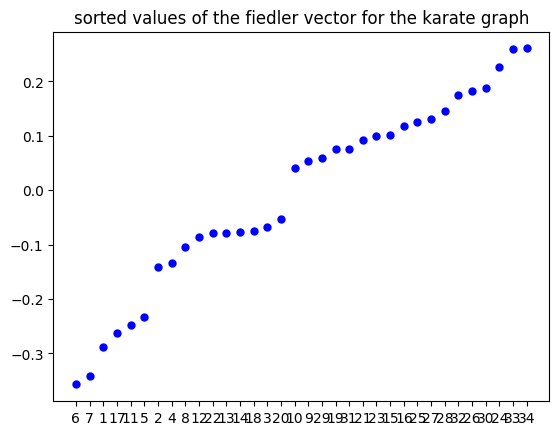

In [96]:
normalized_Laplacian = LA.normalized_laplacian_matrix(G).toarray()
import numpy as np
eig_values, eig_vectors = np.linalg.eig(normalized_Laplacian)
sorted_indices = np.argsort(eig_values)
fiedler_vector = eig_vectors[:,sorted_indices[1]]
sorted_fiedler_vector = np.sort(fiedler_vector)
plt.plot(sorted_fiedler_vector,'b.',markersize=10)
plt.title("sorted values of the fiedler vector for the karate graph")
tmp = plt.xticks(ticks = range(0,len(fiedler_vector)), labels = np.argsort(fiedler_vector)+1)

Cluster subjectively

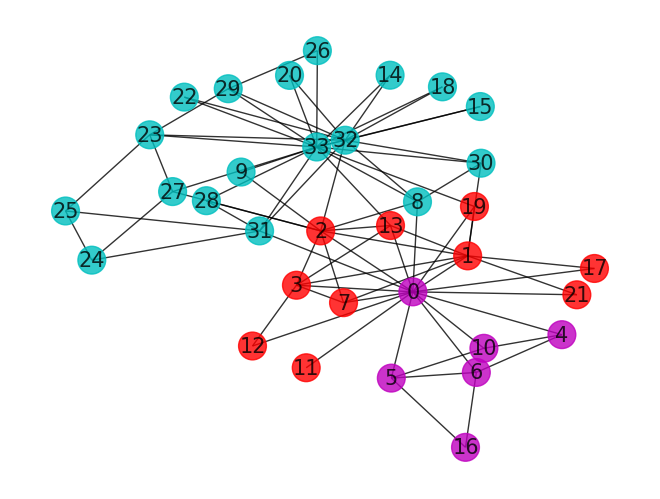

In [112]:
nodes_sorted_by_fiedler_value = np.argsort(fiedler_vector)
magenta_cluster = [i for i in range(len(fiedler_vector)) if fiedler_vector[i] <-0.2]
cyan_cluster = [i for i in range(len(fiedler_vector)) if fiedler_vector[i] >0]
red_cluster = [i for i in range(len(fiedler_vector)) if fiedler_vector[i] <=0 and fiedler_vector[i]>=-0.2]
colormap = ['y' for nodes in list(G.nodes())]
for node in list(G.nodes()):
    if node in magenta_cluster: colormap[node] = 'm'
    elif node in red_cluster: colormap[node] = 'r'
    elif node in cyan_cluster: colormap[node] = 'c'

nx.draw(G,pos,with_labels = True,node_color = colormap, node_size = 400,font_size = 15, alpha=0.8)

Text(0.5, 1.0, 'embedding of karate graph in 2D space')

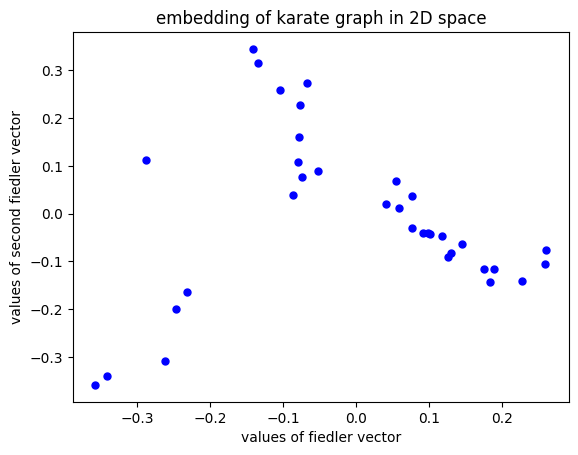

In [114]:
fiedler_vector = eig_vectors[:,sorted_indices[1]]
second_fiedler_vector = eig_vectors[:,sorted_indices[2]]
tmp = plt.plot(fiedler_vector,second_fiedler_vector,'b.',markersize = 10)
plt.xlabel('values of fiedler vector')
plt.ylabel('values of second fiedler vector')
plt.title('embedding of karate graph in 2D space')

(array([[-1.68005398, -1.22362039],
       [ 0.31589928,  0.18667737]]), 0.9160368750258352)


TypeError: tuple indices must be integers or slices, not tuple

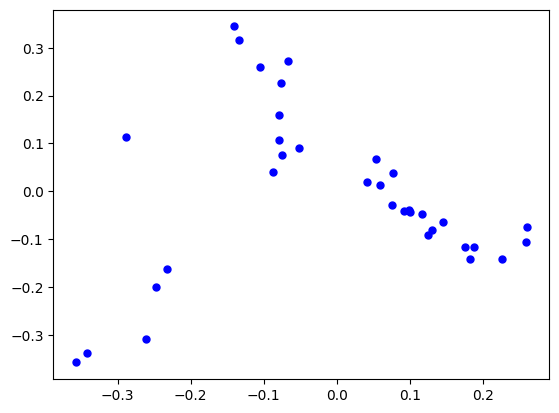

In [134]:
from scipy.cluster.vq import vq, kmeans, whiten
embedding = []
for i in range(len(fiedler_vector)):
    embedding.append([fiedler_vector[i],second_fiedler_vector[i]])
whitened = whiten(embedding)
book = np.array((whitened[0],whitened[2]))
cluster_means,distortion = kmeans(whitened,book)
print(cluster_means)

tmp = plt.plot(fiedler_vector,second_fiedler_vector,'b.',markersize = 10)
tmp = plt.plot(cluster_means[:,0],cluster_means[:,1],'cx',markersize=20)
plt.xlabel('values of fiedler vector')
plt.ylabel('values of second fiedler vector')
plt.title('embedding of karate graph in 2D space')